Maybe this is not the best example of a Capstone, as using well-known datasets is not the most impressive thing for your portfolio.

However, it will serve as a good example for getting data into our github portfolio.

### Part 1

Import packages:

In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge

Now, load the data and set X and y from `boston.data` and `boston.target`:

In [3]:
boston = load_boston()

X = boston.data
y = boston.target

Here we are (over)-fitting a couple regularized linear regression models:

In [4]:
mylasso = Lasso()
myridge = Ridge()

mylasso.fit(X,y)
myridge.fit(X,y)

print(mylasso.coef_)
print(myridge.coef_)

[-0.06343729  0.04916467 -0.          0.         -0.          0.9498107
  0.02090951 -0.66879     0.26420643 -0.01521159 -0.72296636  0.00824703
 -0.76111454]
[-1.04595278e-01  4.74432243e-02 -8.80467889e-03  2.55239322e+00
 -1.07770146e+01  3.85400020e+00 -5.41453810e-03 -1.37265353e+00
  2.90141589e-01 -1.29116463e-02 -8.76074394e-01  9.67327945e-03
 -5.33343225e-01]


Let's try some scaling first, maybe?

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
mylasso = Lasso()
myridge = Ridge()

mylasso.fit(X_scaled,y)
myridge.fit(X_scaled,y)

print(mylasso.coef_)
print(myridge.coef_)

[-0.          0.         -0.          0.         -0.          2.7133553
 -0.         -0.         -0.         -0.         -1.3435488   0.18095664
 -3.54338107]
[-0.91987132  1.06646104  0.11738487  0.68512693 -2.02901013  2.68275376
  0.01315848 -3.07733968  2.59153764 -2.0105579  -2.05238455  0.84884839
 -3.73066646]


### Part 2

Now that we've fit some models, let's take a look at how the coefficients between lasso and ridge computer. We can pull the feature names out of the `sklearn` bunch object:

In [13]:
import numpy as np
boston.feature_names[np.abs(mylasso.coef_) > 0]

array(['RM', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Now let's make a data frame, and visualize the different regression coefficients!

In [14]:
import pandas as pd

coef_df = pd.DataFrame({'lasso':mylasso.coef_, 'ridge':myridge.coef_}, index=boston.feature_names)

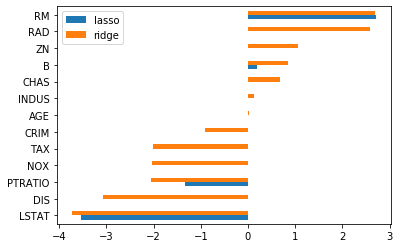

In [19]:
import matplotlib.pyplot as plt
coef_df.sort_values(by='ridge', inplace=True)
coef_df.plot(kind='barh')
plt.show()